In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def diagrama_antena_estacao_terrena(beta):
    """
    Calcula o ganho da antena para um dado ângulo beta.

    Parâmetros:
    beta (float ou np.ndarray): Ângulo em graus.

    Retorna:
    float ou np.ndarray: Ganho da antena em dBi.
    """
    beta = np.asarray(beta)  
   
    G = np.empty_like(beta, dtype=float)

    condition1 = (beta >= 0) & (beta <= 0.76025)
    condition2 = (beta > 0.76025) & (beta <= 1)
    condition3 = (beta > 1) & (beta <= 48)
    condition4 = (beta > 48) & (beta <= 180)

    G[condition1] = 47.5 - 26.8177 * beta[condition1] ** 2
    G[condition2] = 32
    G[condition3] = 32 - 25 * np.log10(beta[condition3])
    G[condition4] = -10

    G[~(condition1 | condition2 | condition3 | condition4)] = np.nan

    if G.size == 1:
        return G.item()
    return G

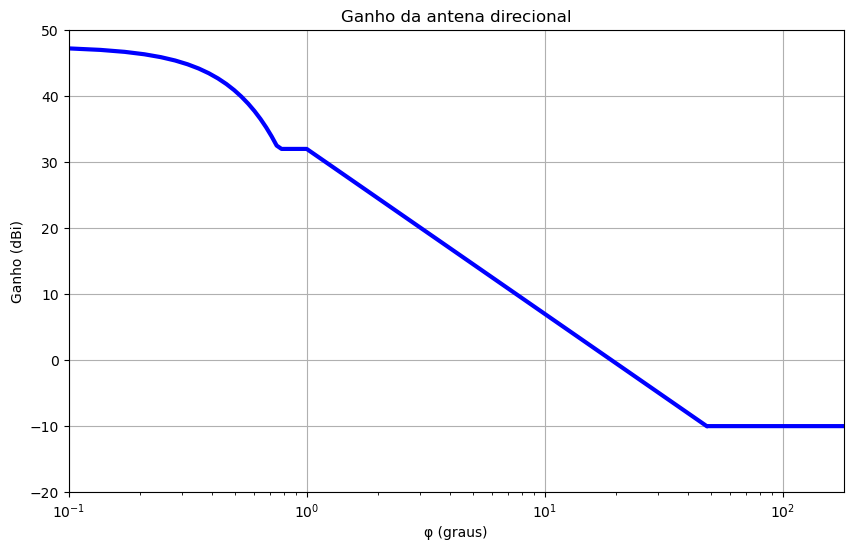

In [37]:
plt.figure(figsize=(10, 6))
beta = np.linspace(0.1, 180, 5000)  # Ângulos de 0 a 180 graus
ganho = diagrama_antena_estacao_terrena(beta)
plt.semilogx(beta, ganho, linewidth=3, color='b')
plt.title('Ganho da antena direcional')
plt.ylabel('Ganho (dBi)')
plt.xlabel('φ (graus)')
plt.xlim(0.1, 180)
plt.ylim(-20, 50)
plt.grid(True)
plt.show()

In [36]:
# Example usage:
beta_angles = np.array([0.5, 1.0, 10.0, 50.0, 200.0])
gains = diagrama_antena_estacao_terrena(beta_angles)
print(gains)

print(diagrama_antena_estacao_terrena(30))

[ 40.795575  32.         7.       -10.              nan]
-4.928031367991558
